In [ ]:
# IMPORTING PACKAGES (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric

In [ ]:
#EXPLORATORY DATA ANALYSIS (EDA)


In [ ]:
# IMPORTING DATA AND DISPLAYING FIRST 5 ROWS (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

In [ ]:
#Defining the data shape (Display of no rows and column) (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

df.shape

(284807, 30)

In [ ]:
#Checking Dataframe Structure (Checking for missing data) (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [ ]:
#Statistical Summary (Display of values in each column) (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,7.092545e-13,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
# Checking percentage of missing values in the columns (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
V1,0.0
V2,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


In [ ]:
#Checking Distribution of the classes (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

classes = df['Class'].value_counts()
classes




0    284315
1       492
Name: Class, dtype: int64

In [ ]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [ ]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

In [ ]:
#Understanding Distribution of the classes (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [ ]:
#Discriptive statistical Display of the Amount class (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)


nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


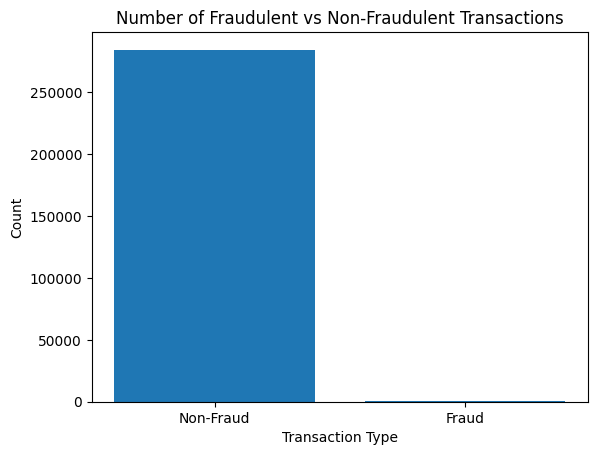

In [ ]:
# Bar plot Visualisation of cases_(SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])

# Create a bar plot
plt.bar(['Non-Fraud', 'Fraud'], [nonfraud_count, fraud_count])
plt.title('Number of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show()

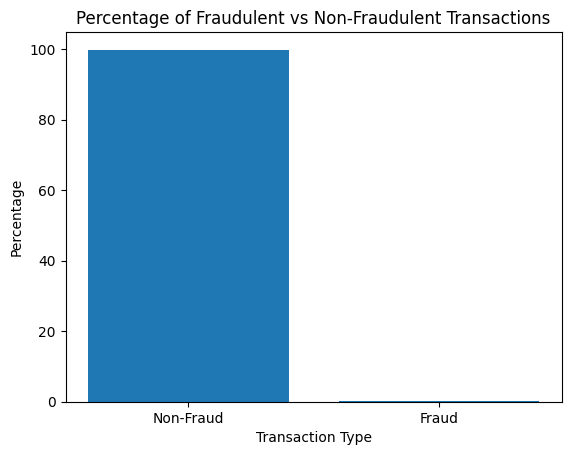

In [ ]:
# Bar plot Visualisation of percentage of cases_(SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

# Get the percentage of non-fraudulent and fraudulent cases
nonfraud_pct = round(len(df[df.Class == 0]) / len(df) * 100, 2)
fraud_pct = round(len(df[df.Class == 1]) / len(df) * 100, 2)

# Create a bar plot
plt.bar(['Non-Fraud', 'Fraud'], [nonfraud_pct, fraud_pct])
plt.title('Percentage of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Percentage')
plt.show()

In [ ]:
#Feature_Scaling using standardscalar (Normalising the Amount features to have similar range) (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020) 

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


In [ ]:
# DATA SPLITTING {Into Test and Train sets} (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])

print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])

print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])

print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489557  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440064 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726225  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# MODELING (Building the classification models) (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)

# 2. K-Nearest Neighbors

n = 5

knn = KNeighborsClassifier(n_neighbors = n)
knn.fit(X_train, y_train)
knn_yhat = knn.predict(X_test)

# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)

# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 6. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

In [ ]:
#Evaluation and Results (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the KNN model is 0.9995259997893332
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9992977774656788
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


In [ ]:
# 2. F1 score (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the KNN model is 0.8571428571428572
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7727272727272727
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
------------------------------------------------------------------------


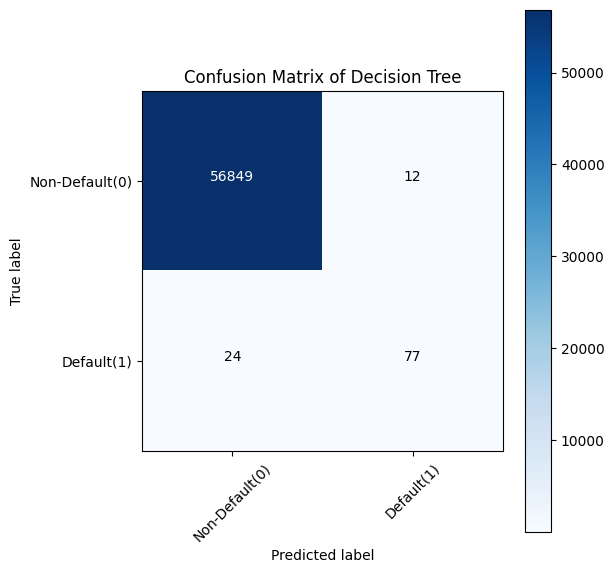

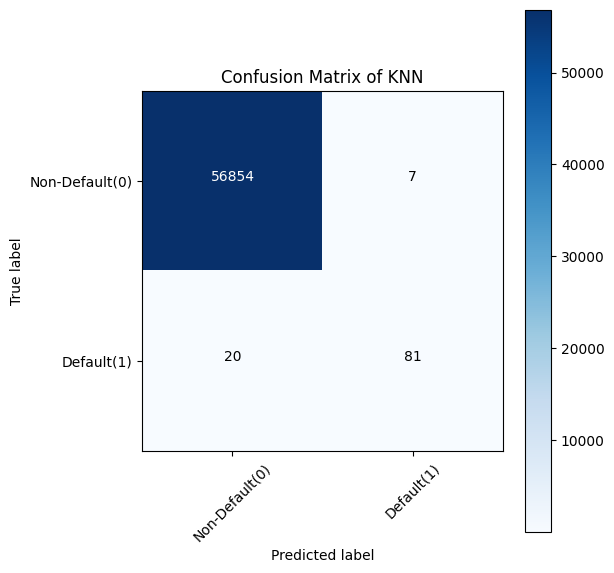

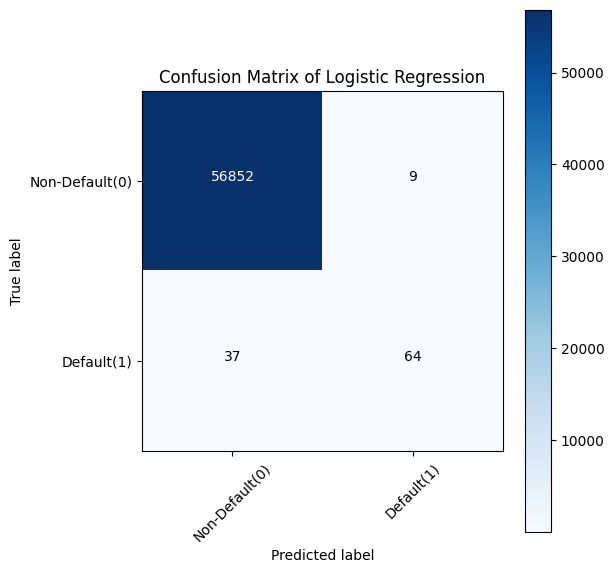

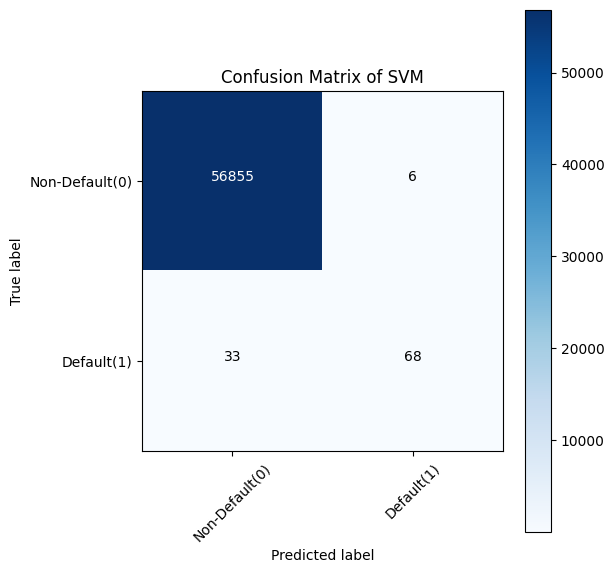

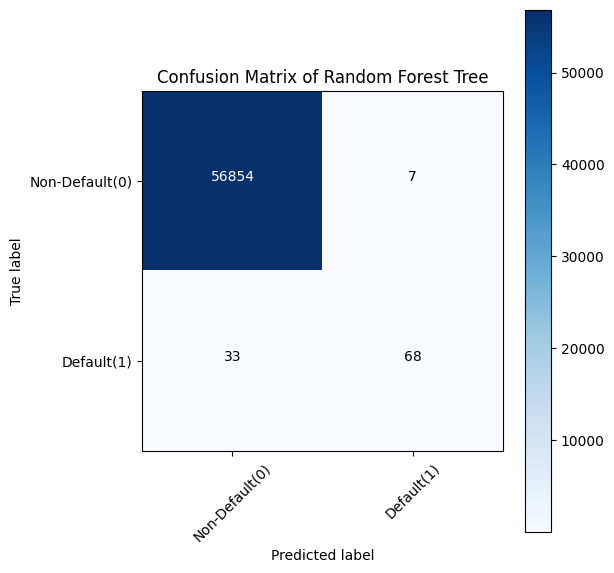

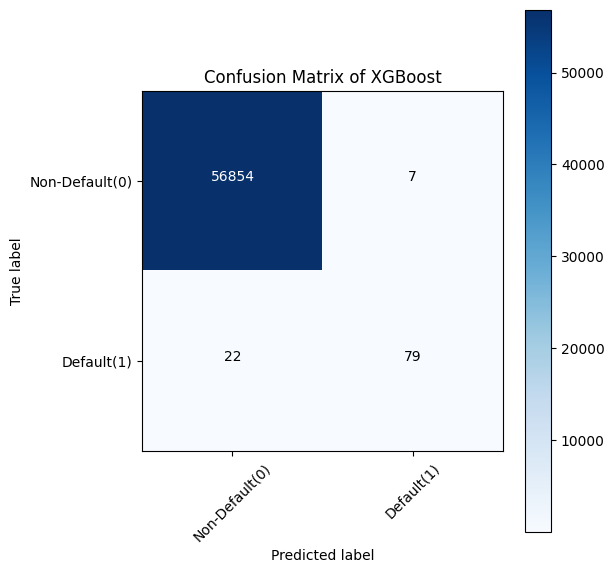

In [ ]:
# 3. Confusion Matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# 2. K-Nearest Neighbors (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

knn_cm_plot = plot_confusion_matrix(knn_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'KNN')
plt.savefig('knn_cm_plot.png')
plt.show()

# 3. Logistic regression (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 4. Support Vector Machine (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 5. Random forest tree (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 6. XGBoost (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()

In [ ]:
#computing and displaying confusion matrix for the Decision Tree model 

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1])
print(tree_matrix)

[[56849    12]
 [   24    77]]


In [ ]:
#computing and displaying confusion matrix for the K-Nearest Neighbors model (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) 
print(knn_matrix)

[[56854     7]
 [   20    81]]


In [ ]:
#computing and displaying confusion matrix for the Logistic Regression model (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) 
print(lr_matrix)

[[56852     9]
 [   37    64]]


In [ ]:
#computing and displaying confusion matrix for the Support Vector Machine model (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) 
print(svm_matrix)

[[56855     6]
 [   33    68]]


In [ ]:
#computing and displaying confusion matrix for the Random Forest Tree model (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) 
print(rf_matrix)

[[56854     7]
 [   33    68]]


In [ ]:
#computing and displaying confusion matrix for the XGBoost model (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) 
print(xgb_matrix)

[[56854     7]
 [   22    79]]


In [ ]:
# Getting TP, TN, FP, FN  for decision tree_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = tree_matrix[1, 1]
TN = tree_matrix[0, 0]
FP = tree_matrix[0, 1]
FN = tree_matrix[1, 0]

In [ ]:
# Sensitivity score for decision tree_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.7623762376237624


In [ ]:
# Specificity score for decision tree_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.999788959040467


In [ ]:
# Precision score for decision tree_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.8651685393258427


In [ ]:
# Getting TP, TN, FP, FN  for  k-nearest neigbor KNN_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = knn_matrix[1, 1]
TN = knn_matrix[0, 0]
FP = knn_matrix[0, 1]
FN = knn_matrix[1, 0]

In [ ]:
# Sensitivity score for KNN_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.801980198019802


In [ ]:
# Specificity score for KNN_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998768927736058


In [ ]:
# Precision score for KNN_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.9204545454545454


In [ ]:
# Getting TP, TN, FP, FN  for logistic regression lr_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = lr_matrix[1, 1]
TN = lr_matrix[0, 0]
FP = lr_matrix[0, 1]
FN = lr_matrix[1, 0]

In [ ]:
# Sensitivity score for lr_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.6336633663366337


In [ ]:
# Specificity score for lr_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998417192803504


In [ ]:
# Precision score for lr_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.8767123287671232


In [ ]:
# Getting TP, TN, FP, FN  for support vector machine svm_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = svm_matrix[1, 1]
TN = svm_matrix[0, 0]
FP = svm_matrix[0, 1]
FN = svm_matrix[1, 0]

In [ ]:
# Sensitivity score for svm_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.6732673267326733


In [ ]:
# Specificity score for svm_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998944795202336


In [ ]:
# Precision score for svm_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.918918918918919


In [ ]:
# Getting TP, TN, FP, FN  for Random forest rf_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = rf_matrix[1, 1]
TN = rf_matrix[0, 0]
FP = rf_matrix[0, 1]
FN = rf_matrix[1, 0]

In [ ]:
# Sensitivity score for rf_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.6732673267326733


In [ ]:
# Specificity score for rf_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998768927736058


In [ ]:
# Precision score for rf_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.9066666666666666


In [ ]:
# Getting TP, TN, FP, FN  for XGboost xgb_matrix from the confusion matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
TP = xgb_matrix[1, 1]
TN = xgb_matrix[0, 0]
FP = xgb_matrix[0, 1]
FN = xgb_matrix[1, 0]

In [ ]:
# Sensitivity score for xgb_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Sensitivity:-",TP / float(TP+FN))

Sensitivity:- 0.7821782178217822


In [ ]:
# Specificity score for xgb_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("Specificity:-", TN / float(TN+FP))

Specificity:- 0.9998768927736058


In [ ]:
# Precision score for xgb_matrix (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)
print("precision:-", TP / float(TP+FP))

precision:- 0.9186046511627907


In [ ]:
#Tabulating and displaying model performance metrics (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

from tabulate import tabulate

headers = ["Model", "Accuracy Score", "F1 Score", "Sensitivity", "Specificity", "precision"  ]
rows = [
    ["Decision Tree", 0.9993679997191109, 0.8105263157894738, 0.7623762376237624, 0.999788959040467, 0.8651685393258427],
    ["K-Nearest Neighbors", 0.9995259997893332, 0.8571428571428572, 0.801980198019802, 0.9998768927736058, 0.9204545454545454 ],
    ["Logistic Regression", 0.9991924440855307, 0.7356321839080459, 0.6336633663366337, 0.9998417192803504, 0.8767123287671232],
    ["SVM", 0.9993153330290369, 0.7771428571428572, 0.6732673267326733, 0.9998944795202336, 0.918918918918919],
    ["Random Forest Tree", 0.9992977774656788, 0.7727272727272727, 0.6732673267326733, 0.9998768927736058, 0.9066666666666666],
    ["XGBoost", 0.9994908886626171, 0.8449197860962566, 0.7821782178217822, 0.9998768927736058, 0.9186046511627907]
]

print(tabulate(rows, headers=headers))

Model                  Accuracy Score    F1 Score    Sensitivity    Specificity    precision
-------------------  ----------------  ----------  -------------  -------------  -----------
Decision Tree                0.999368    0.810526       0.762376       0.999789     0.865169
K-Nearest Neighbors          0.999526    0.857143       0.80198        0.999877     0.920455
Logistic Regression          0.999192    0.735632       0.633663       0.999842     0.876712
SVM                          0.999315    0.777143       0.673267       0.999894     0.918919
Random Forest Tree           0.999298    0.772727       0.673267       0.999877     0.906667
XGBoost                      0.999491    0.84492        0.782178       0.999877     0.918605


In [ ]:
# Performance display of the best model KNN using ROC curve (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

from sklearn.metrics import roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

# Assume X_train, X_test, y_train, y_test are the training and testing data, respectively
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = knn.predict(X_test)

# Calculate the ROC curve and AUC for the KNN model
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

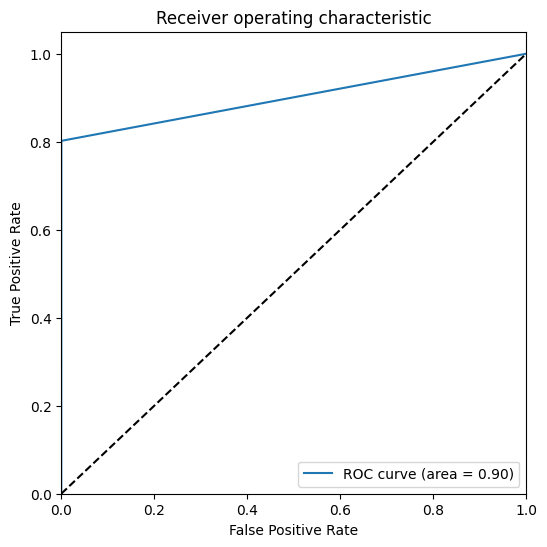

In [ ]:
# Visualisation of the KNN ROC curve (SEC6201_UNDERGRADUATEPROJECT_FINALREPORT_2220020)

import matplotlib.pyplot as plt

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()